
Training on Diabetes:
Epoch 1/50


C:\Users\vikas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5135 - loss: 0.7202 - val_accuracy: 0.5915 - val_loss: 0.7033
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5017 - loss: 0.7106 - val_accuracy: 0.6056 - val_loss: 0.6803
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5992 - loss: 0.6589 - val_accuracy: 0.6479 - val_loss: 0.6635
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6458 - loss: 0.6390 - val_accuracy: 0.6338 - val_loss: 0.6508
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6544 - loss: 0.6077 - val_accuracy: 0.6479 - val_loss: 0.6414
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6359 - loss: 0.6221 - val_accuracy: 0.6338 - val_loss: 0.6336
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6758 - loss: 0.5927 - val_accuracy: 0.6479 - val_loss: 0.6272
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7352 - loss: 0.5516 - val_accuracy: 0.6338 - val_loss: 0.6216
Epoch 9/50
9/9 ━━━

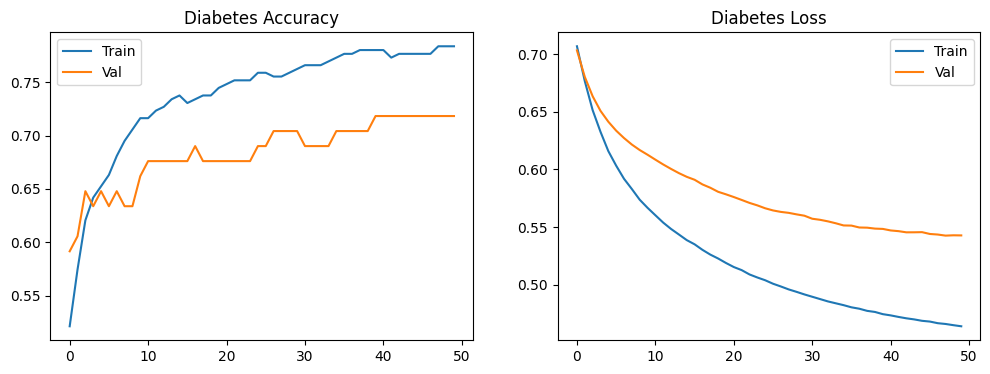

Test accuracy: 0.7303

Training on Cancer:
Epoch 1/50


C:\Users\vikas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4356 - loss: 0.8533 - val_accuracy: 0.5495 - val_loss: 0.6248
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5828 - loss: 0.6266 - val_accuracy: 0.7802 - val_loss: 0.4518
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7715 - loss: 0.4620 - val_accuracy: 0.8901 - val_loss: 0.3453
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8413 - loss: 0.3899 - val_accuracy: 0.9451 - val_loss: 0.2787
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9038 - loss: 0.3154 - val_accuracy: 0.9560 - val_loss: 0.2361
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8885 - loss: 0.2902 - val_accuracy: 0.9670 - val_loss: 0.2059
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9008 - loss: 0.2620 - val_accuracy: 0.9670 - val_loss: 0.1836
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9153 - loss: 0.2505 - val_accuracy: 0.9670 - val_loss: 0.1665
Ep

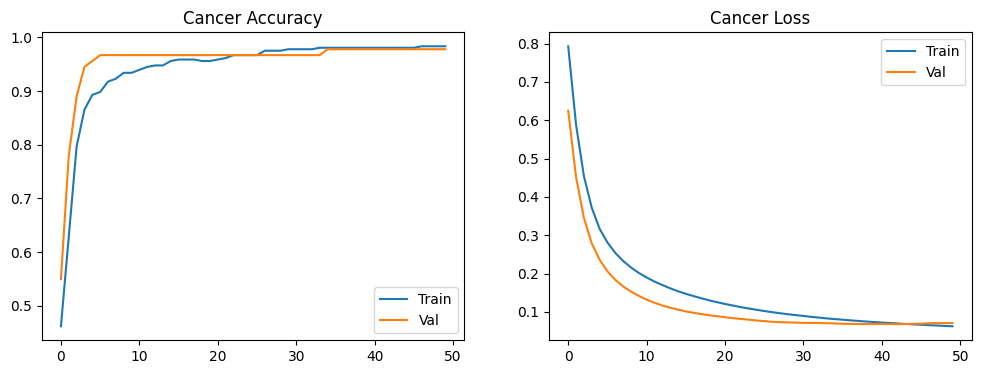

Test accuracy: 0.9649

Training on Sonar:
Epoch 1/50


C:\Users\vikas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5065 - loss: 0.7527 - val_accuracy: 0.5588 - val_loss: 0.7709
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6381 - loss: 0.6591 - val_accuracy: 0.5882 - val_loss: 0.7189
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6972 - loss: 0.6282 - val_accuracy: 0.5882 - val_loss: 0.6725
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7106 - loss: 0.6066 - val_accuracy: 0.5882 - val_loss: 0.6303
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7769 - loss: 0.5297 - val_accuracy: 0.6471 - val_loss: 0.5920
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8317 - loss: 0.5005 - val_accuracy: 0.7353 - val_loss: 0.5565
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8523 - loss: 0.4433 - val_accuracy: 0.7941 - val_loss: 0.5234
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8313 - loss: 0.4442 - val_accuracy: 0.8529 - val_loss: 0.4925
Epoch 9/50


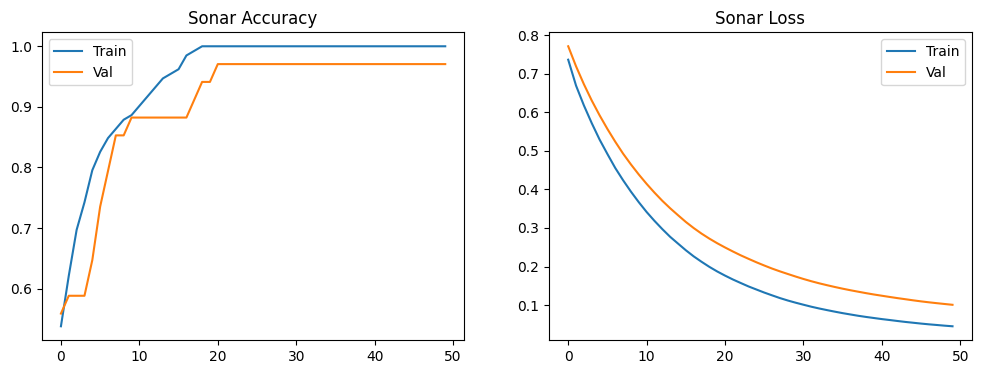

Test accuracy: 1.0000


In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load datasets
diabetes = load_diabetes()
cancer = load_breast_cancer()
sonar = np.genfromtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", delimiter=",")
datasets = {
    "Diabetes": (diabetes.data, (diabetes.target > diabetes.target.mean()).astype(int)),
    "Cancer": (cancer.data, cancer.target),
    "Sonar": (sonar[:, :-1], (sonar[:, -1] == "R").astype(int))
}

for name, (X, y) in datasets.items():
    print(f"\nTraining on {name}:")
    
    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Create and train model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)
    
    # Plot results
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{name} Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'{name} Loss')
    plt.legend()
    plt.show()
    
    print(f"Test accuracy: {model.evaluate(X_test, y_test, verbose=0)[1]:.4f}")


Training on Diabetes:
Epoch 1/50


C:\Users\vikas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3192 - loss: 1.0372 - val_accuracy: 0.3521 - val_loss: 0.9944
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3829 - loss: 0.9547 - val_accuracy: 0.3521 - val_loss: 0.9473
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3660 - loss: 0.9223 - val_accuracy: 0.3662 - val_loss: 0.9047
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3938 - loss: 0.8746 - val_accuracy: 0.3944 - val_loss: 0.8660
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3898 - loss: 0.8447 - val_accuracy: 0.3803 - val_loss: 0.8312
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4045 - loss: 0.8182 - val_accuracy: 0.3944 - val_loss: 0.7996
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3952 - loss: 0.7789 - val_accuracy: 0.4085 - val_loss: 0.7721
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4545 - loss: 0.7525 - val_accuracy: 0.4366 - val_loss: 0.7470
Epoch 9/50
9/9 ━━━

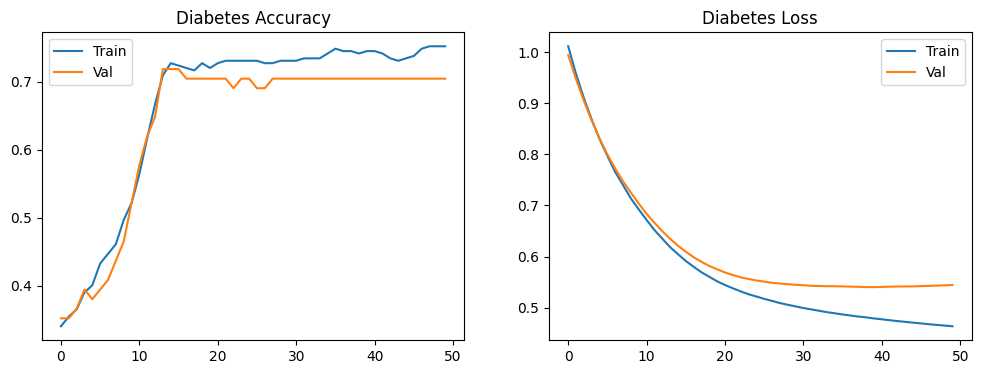

Test accuracy: 0.7079

Training on Cancer:
Epoch 1/50


C:\Users\vikas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5469 - loss: 1.0647 - val_accuracy: 0.6154 - val_loss: 0.8465
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5907 - loss: 0.7621 - val_accuracy: 0.6923 - val_loss: 0.6038
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7759 - loss: 0.5456 - val_accuracy: 0.8352 - val_loss: 0.4610
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8849 - loss: 0.4205 - val_accuracy: 0.8901 - val_loss: 0.3856
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9252 - loss: 0.3536 - val_accuracy: 0.9011 - val_loss: 0.3401
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9278 - loss: 0.3175 - val_accuracy: 0.9011 - val_loss: 0.3078
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9312 - loss: 0.2917 - val_accuracy: 0.9121 - val_loss: 0.2841
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9398 - loss: 0.2576 - val_accuracy: 0.9231 - val_loss: 0.2654
Ep

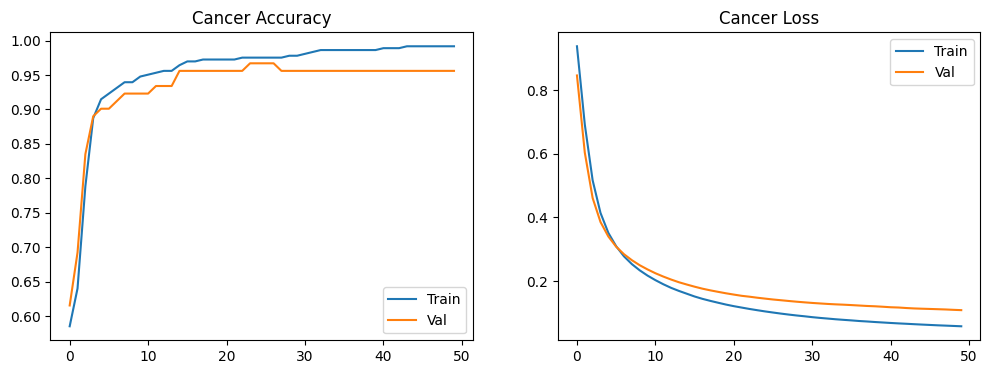

Test accuracy: 0.9737

Training on Sonar:
Epoch 1/50


C:\Users\vikas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9553 - loss: 0.3477 - val_accuracy: 0.9412 - val_loss: 0.3475
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9703 - loss: 0.3310 - val_accuracy: 0.9706 - val_loss: 0.3119
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9866 - loss: 0.2868 - val_accuracy: 0.9706 - val_loss: 0.2810
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.2464 - val_accuracy: 0.9706 - val_loss: 0.2551
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.2298 - val_accuracy: 0.9706 - val_loss: 0.2330
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.2148 - val_accuracy: 0.9706 - val_loss: 0.2131
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.1896 - val_accuracy: 0.9706 - val_loss: 0.1960
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.1682 - val_accuracy: 0.9706 - val_loss: 0.1813
Epoch 9/50


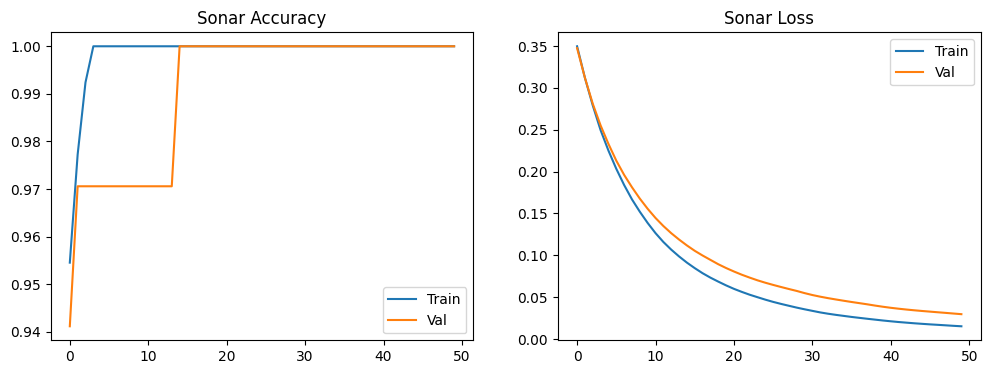

Test accuracy: 1.0000


In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_breast_cancer, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load datasets
diabetes = load_diabetes()
cancer = load_breast_cancer()
sonar = fetch_openml(name='sonar', version=1, as_frame=False)

# Prepare datasets
datasets = {
    "Diabetes": (diabetes.data, (diabetes.target > diabetes.target.mean()).astype(int)),
    "Cancer": (cancer.data, cancer.target),
    "Sonar": (sonar.data, (sonar.target == 'R').astype(int))
}

for name, (X, y) in datasets.items():
    print(f"\nTraining on {name}:")

    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create and train model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

    # Plot results
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{name} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'{name} Loss')
    plt.legend()
    plt.show()

    print(f"Test accuracy: {model.evaluate(X_test, y_test, verbose=0)[1]:.4f}")
